In [49]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.applications import VGG16
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
import os
from PIL import Image
import numpy as np
import pandas as pd

In [11]:
# Paths to the directories containing the images
directory_paths = [
    r'C:\Users\njeri\Documents\Projects\FashionAI\round1_fashionAI_attributes_train\base\Images',
    r'C:\Users\njeri\Documents\Projects\FashionAI\round2_fashionAI_attributes_train\Images'
]

# List to store all image paths
all_image_paths = []

# Function to recursively collect image paths from directories
def collect_image_paths(directory_path):
    # List all files and directories in the current directory
    for item in os.listdir(directory_path):
        # Construct full path of the item
        item_path = os.path.join(directory_path, item)
        
        # If item is a directory, recursively call function
        if os.path.isdir(item_path):
            collect_image_paths(item_path)
        # If item is a file and has an image extension, add to all_image_paths
        elif os.path.isfile(item_path) and item.lower().endswith(('.png', '.jpg', '.jpeg', '.gif', '.bmp')):
            all_image_paths.append(item_path)

# Iterate through each directory and collect image paths
for directory_path in directory_paths:
    collect_image_paths(directory_path)

# Now all_image_paths contains the full paths of all image files in the provided directories
all_image_paths

['C:\\Users\\njeri\\Documents\\Projects\\FashionAI\\round1_fashionAI_attributes_train\\base\\Images\\coat_length_labels\\00075db6ca24b04651e6171e1b70309c.jpg',
 'C:\\Users\\njeri\\Documents\\Projects\\FashionAI\\round1_fashionAI_attributes_train\\base\\Images\\coat_length_labels\\000a7bac19435a6a009d4d817293c779.jpg',
 'C:\\Users\\njeri\\Documents\\Projects\\FashionAI\\round1_fashionAI_attributes_train\\base\\Images\\coat_length_labels\\00187c92481171bfa6e3d75184c74c3a.jpg',
 'C:\\Users\\njeri\\Documents\\Projects\\FashionAI\\round1_fashionAI_attributes_train\\base\\Images\\coat_length_labels\\0019c11b6b0eaba29749e59391119040.jpg',
 'C:\\Users\\njeri\\Documents\\Projects\\FashionAI\\round1_fashionAI_attributes_train\\base\\Images\\coat_length_labels\\001f79f24e49fb08bc1d16953a2e9f7d.jpg',
 'C:\\Users\\njeri\\Documents\\Projects\\FashionAI\\round1_fashionAI_attributes_train\\base\\Images\\coat_length_labels\\00320fd9c425cc72f8130e07e60d8fa8.jpg',
 'C:\\Users\\njeri\\Documents\\Projects\

In [12]:
# Define function to resize images
def resize_images(all_image_paths, output_dir, target_resolution=(224, 224)):
    # Create output directory if it doesn't exist
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)
    
    # Iterate through each image path in the list
    for image_path in all_image_paths:
        # Get the filename from the path
        filename = os.path.basename(image_path)
        
        # Ignore files starting with '._'
        if not filename.startswith('._'):
            # Open the image
            try:
                image = Image.open(image_path)
                
                # Resize the image to the target resolution
                resized_image = image.resize(target_resolution)
                
                # Save the resized image to the output directory
                output_path = os.path.join(output_dir, filename)
                resized_image.save(output_path)
            except Exception as e:
                print(f"Error processing {image_path}: {e}")

# Example usage
output_dir = r'C:\Users\njeri\Documents\Projects\FashionAI\Resized_Images'
resize_images(all_image_paths, output_dir, target_resolution=(224, 224))


In [20]:
# Load pre-trained VGG16 model
model = VGG16(weights='imagenet', include_top=False)

# Function to extract features from an image
def extract_features(img_path, model):
    img = image.load_img(img_path, target_size=(224, 224))  # VGG16 input size
    img_data = image.img_to_array(img)
    img_data = np.expand_dims(img_data, axis=0)
    img_data = preprocess_input(img_data)
    features = model.predict(img_data)
    return features.flatten()


In [21]:
# Function to find similar images given a query image
def find_similar_images(query_img_path, dataset_dir, top_n=5):
    query_features = extract_features(query_img_path, model)
    similarities = {}
    for img_file in os.listdir(dataset_dir):
        img_path = os.path.join(dataset_dir, img_file)
        img_features = extract_features(img_path, model)
        similarity = cosine_similarity([query_features], [img_features])[0][0]
        similarities[img_file] = similarity
    sorted_similarities = sorted(similarities.items(), key=lambda x: x[1], reverse=True)
    similar_images = [img_file for img_file, _ in sorted_similarities[:top_n]]
    return similar_images

In [22]:
# Example usage
query_img_path = 'query_image.jpg'
dataset_dir = 'sample_images/'
similar_images = find_similar_images(query_img_path, dataset_dir)
print("Similar images:", similar_images)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 403ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 281ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 325ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 270ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 293ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 276ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 272ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 280ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 316ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 313ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 296ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 284ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 289ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 287ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 257ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 270ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 255ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 277ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 298ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 297ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 303ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 321ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 320ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 280ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 280ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 

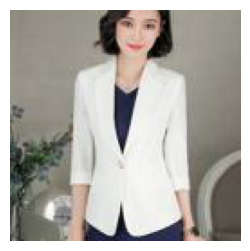

In [23]:
img_data = Image.open('query_image.jpg')
plt.figure(figsize=(3, 3))
# Display the query image
plt.imshow(img_data)
plt.axis('off')  # Turn off axis
plt.show()

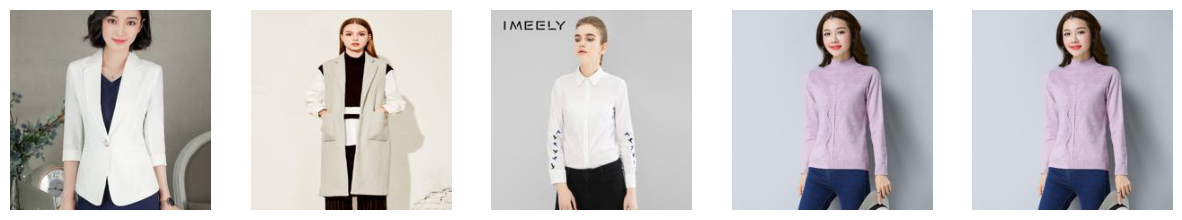

In [24]:
# Display similar images
plt.figure(figsize=(15, 5))
for i, img_file in enumerate(similar_images):
    img_path = os.path.join(dataset_dir, img_file)
    img_data = Image.open(img_path)
    plt.subplot(1, len(similar_images), i + 1)
    plt.imshow(img_data)
    plt.axis('off')
plt.show()

In [36]:

def combine_and_modify_labels(file1_path, file2_path, output_path):
    # Load the datasets
    round1_label = pd.read_csv(file1_path,header=None)
    round2_label = pd.read_csv(file2_path,header=None)

    # Standardize column names for both DataFrames
    round1_label.columns = ['filename', 'category', 'label']
    round2_label.columns = ['filename', 'category', 'label']

    # Concatenate both DataFrames
    combined_labels = pd.concat([round1_label, round2_label], ignore_index=True)

    # Modify the filenames to add the 'Resized_' prefix
    combined_labels['filename'] = 'Resized_' + combined_labels['filename']

    # Save the combined DataFrame to a new CSV file
    combined_labels.to_csv(output_path, index=False)
    print(f"Combined file saved to {output_path}")

# Example usage
if __name__ == "__main__":
    file1_path = r'C:\Users\njeri\Documents\Projects\FashionAI\round1_fashionAI_attributes_train\base\Annotations\label.csv'
    file2_path = r'C:\Users\njeri\Documents\Projects\FashionAI\round2_fashionAI_attributes_train\Annotations\label.csv'
    output_path = r'C:\Users\njeri\Documents\Projects\FashionAI\Resized\Annotations\resized_label.csv'
    
    combine_and_modify_labels(file1_path, file2_path, output_path)


Combined file saved to C:\Users\njeri\Documents\Projects\FashionAI\Resized\Annotations\resized_label.csv


In [47]:

# Load the CSV file containing labels
labels_df = pd.read_csv(r'\\LC\Users\njeri\Documents\Projects\FashionAI\Resized\Annotations\resized_label.csv')

# Remove anything between "Resized_Images" and the image name
labels_df['filename'] = labels_df['filename'].str.replace(r'Resized_Images/[^/]+/', 'Resized_Images/', regex=True)

# Concatenate 'category' and 'label' columns into a single column 'labels'
labels_df['labels'] = labels_df['category'] + '_' + labels_df['label']

# Drop the 'category' and 'label' columns if you no longer need them
labels_df.drop(columns=['category', 'label'], inplace=True)

# Display the updated DataFrame
labels_df


,filename,labels
0,Resized_Images/4d8a38b29930a403e5e2167c6e2327b...,collar_design_labels_nnynn
1,Resized_Images/bd0981f231180d2b001d4a37e983463...,collar_design_labels_nynnn
2,Resized_Images/26937e1724feadfe395aaf521848980...,collar_design_labels_ynnnn
3,Resized_Images/cf4140ec542887270ff17a96564f774...,collar_design_labels_nynnn
4,Resized_Images/50644b2b9de045f2d19c6730f2005b1...,collar_design_labels_nynnn
...,...,...
180330,Resized_Images/ce4c2d6793a4989232d4763514e817a...,pant_length_labels_nnnnyn
180331,Resized_Images/aeb2ed079eb041e0b8d84ea4caa3318...,pant_length_labels_nynnnn
180332,Resized_Images/df73c36cf541ba3846c7729c40d5683...,pant_length_labels_ynnnnn
180333,Resized_Images/c2bd3eac95bbbd28d26d2fe9ebca07e...,pant_length_labels_nnnnny


In [61]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# Load the DataFrame
df = labels_df  # Assume 'labels_df' is already defined and loaded

# Convert the 'labels' column to string format
df['labels'] = df['labels'].astype(str)

# Data Preparation
X = df['filename'].values
y = df['labels'].values

# Label Encoding
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
y_str = label_encoder.inverse_transform(y_encoded)  # Not used further, conversion for verification

# Split the data into training and validation sets
X_train, X_val, y_train_encoded, y_val_encoded = train_test_split(X, y_encoded, test_size=0.2, random_state=42)
y_train = label_encoder.inverse_transform(y_train_encoded)
y_val = label_encoder.inverse_transform(y_val_encoded)

# Create an ImageDataGenerator for data augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

# Define the batch size
batch_size = 32

# Create the training data generator
train_generator = train_datagen.flow_from_dataframe(
    dataframe=pd.DataFrame({'filename': X_train, 'labels': y_train}),
    directory='./',  # Directory where images are located
    x_col='filename',
    y_col='labels',
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='sparse',
    shuffle=True
)

# Create the validation data generator
validation_datagen = ImageDataGenerator(rescale=1./255)

validation_generator = validation_datagen.flow_from_dataframe(
    dataframe=pd.DataFrame({'filename': X_val, 'labels': y_val}),
    directory='./',
    x_col='filename',
    y_col='labels',
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='sparse',
    shuffle=False
)

# Model Architecture
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(len(np.unique(y_encoded)), activation='softmax')  # Dynamic class count
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Training
history = model.fit(
    train_generator,
    epochs=3,
    validation_data=validation_generator
)

# Evaluation
loss, accuracy = model.evaluate(validation_generator)
print(f'Validation Loss: {loss}, Validation Accuracy: {accuracy}')


Found 144268 validated image filenames belonging to 156 classes.
Found 36067 validated image filenames belonging to 130 classes.


C:\Users\njeri\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/3


C:\Users\njeri\AppData\Roaming\Python\Python311\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


4509/4509 ━━━━━━━━━━━━━━━━━━━━ 5067s 1s/step - accuracy: 0.0315 - loss: 4.1731 - val_accuracy: 0.0117 - val_loss: 8.6009
Epoch 2/3
4509/4509 ━━━━━━━━━━━━━━━━━━━━ 4673s 1s/step - accuracy: 0.0559 - loss: 3.9364 - val_accuracy: 0.0144 - val_loss: 9.3037
Epoch 3/3
4509/4509 ━━━━━━━━━━━━━━━━━━━━ 4225s 936ms/step - accuracy: 0.0648 - loss: 3.8438 - val_accuracy: 0.0149 - val_loss: 11.0282
1128/1128 ━━━━━━━━━━━━━━━━━━━━ 162s 144ms/step - accuracy: 0.0160 - loss: 11.0112
Validation Loss: 11.028243064880371, Validation Accuracy: 0.014916682615876198
